In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

In [97]:
# Constants.
PI    = np.pi
H_BAR = 1 #6.67*10**(-34)
M     = 1.0

In [98]:
OMEGA = 1.5
g = 0.0

def V(x):
    return 0.5*OMEGA**2*x**2

# H(k)
def Hamiltonian(p):
    return p**2/(2*M)

# H(x).
def Hamiltonian(x,psi_x):
    return V(x)+g*np.abs(psi_x)**2

# Time evolution

$$ \exp{(-i(H(k)+H(x)) dt)} = e^{-iH(k)dt/2} \quad e^{-iH(x)dt} \quad e^{-iH(k)dt/2} $$

In [99]:
L = 10

# Space will be divided into N parts.
N = 1000

r""" Energy """
# Discretization of the momentum space.
dk = 2*PI/L
k = np.hstack([np.arange(0,N/2), np.arange(-N/2,0)])*dk
E_k = (H_BAR**2*k**2)/(2*M)

# Increment in time.
dt = 0.001

r""" Position """
xs = np.linspace(-L,L,N)

# Initial guess.
psi_x = (1/np.sqrt(N))*np.ones(N)

for i in range(10**4):
    
    # Wavefunction is transformed into momentum basis.
    psi_k = fftpack.fft(psi_x)
    # exp(-i H(k) * dt/2) * psi_k.
    psi_k = np.exp(-E_k * dt/2) * psi_k


    # Wavefunction is transformed into position basis.
    psi_x = fftpack.ifft(psi_k)
    # exp(-i H(x) * dt) * psi_x.
    psi_x = np.exp(-Hamiltonian(xs,psi_x) * dt) * psi_x

    
    # Wavefunction is transformed into momentum basis.
    psi_k = fftpack.fft(psi_x)
    psi_k = np.exp(-E_k * dt/2) * psi_k

    
    # Wavefunction is normalized.
    psi_k = psi_k/np.linalg.norm(psi_k)


In [100]:
psi_x = fftpack.ifft(psi_k)

In [101]:
psi_x =psi_x/np.linalg.norm(psi_x)
np.linalg.norm(psi_x)

1.0

In [102]:
# The exact ground state of a quantum harmonic oscillator.
def psi_0(x):
    return (((M*OMEGA/(PI*H_BAR)))**(1/4))*np.exp(-(M*OMEGA/(2*H_BAR))*x**2)

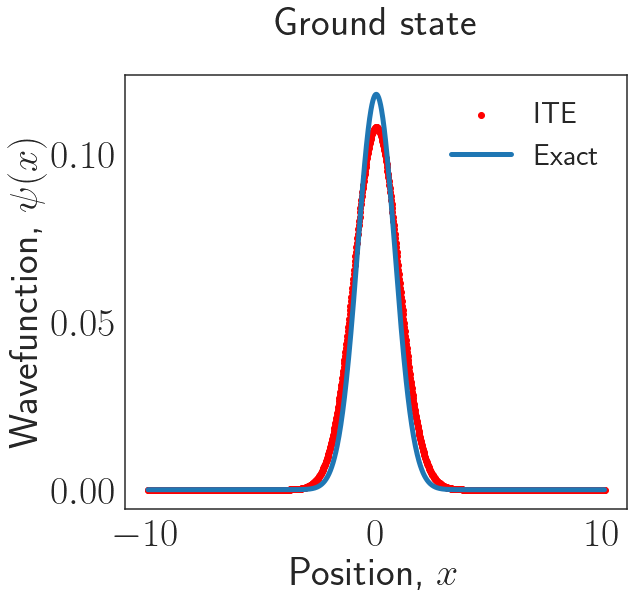

In [103]:
large = 40; med = 30; small = 20
params = {'axes.titlesize': large,
          'axes.titlepad' : large,
          'legend.fontsize': med,
          'axes.labelsize': large ,
          'axes.titlesize': large ,
          'xtick.labelsize': large ,
          'ytick.labelsize': large ,
          'figure.titlesize': large}
plt.rcParams['text.usetex'] = True
#plt.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

plt.rcParams.update(params)
f = plt.figure()
f.set_figwidth(9)
f.set_figheight(8)

# Approximate wavefunction from imaginary time evolution.
plt.scatter(xs,psi_x.real,color='red',label="ITE")
# Exact ground state of the qauntum harmonic oscillator.
plt.plot(xs,psi_0(xs)/np.linalg.norm(psi_0(xs)),linewidth=5,label="Exact")

plt.legend()
plt.title('Exact wavefunction')
plt.xlabel("Position, "+r"$x$",fontweight='bold')  # Set X-axis label
plt.xticks(fontweight='bold')
plt.ylabel("Wavefunction, "+r"$\psi(x)$",fontweight='bold')  # Set Y-axis label
plt.yticks(fontweight='bold')
plt.title('Ground state')
ax = f.gca()
ax.tick_params(axis="x", direction="inout", length=10, width=5, color="k")
ax.tick_params(axis="y", direction="inout", length=10, width=5, color="k")
#plt.grid(linestyle='--', alpha=0.5)
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
plt.show()